In [1]:
# https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/subdomains-poisson/python/documentation.html

In [1]:
from dolfin import *

In [2]:
import dolfin
dolfin.__version__

'2018.1.0'

In [3]:
# Create classes for defining parts of the boundaries and the interior
# of the domain
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0.0)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 1.0)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0.0)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 1.0)

class Obstacle(SubDomain):
    def inside(self, x, on_boundary):
        return (between(x[1], (0.5, 0.7)) and between(x[0], (0.2, 1.0)))

In [4]:
# Initialize sub-domain instances
left = Left()
top = Top()
right = Right()
bottom = Bottom()
obstacle = Obstacle()

In [5]:
# Define mesh
mesh = UnitSquareMesh(dolfin.MPI.comm_world,64, 64)

In [6]:
# Initialize mesh function for interior domains
domains = MeshFunction("size_t", mesh, mesh.topology().dim(),0)
obstacle.mark(domains, 1)

In [7]:
# Initialize mesh function for boundary domains
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1,0)
left.mark(boundaries, 1)
top.mark(boundaries, 2)
right.mark(boundaries, 3)
bottom.mark(boundaries, 4)

In [20]:
# Define input data
a0 = Constant(1.0)
a1 = Constant(0.01)
g_L = Expression("- 10*(- pow(x[1] - 0.5, 2))",degree=2)
g_R = Constant(1.0)
f = Constant(1.0)

In [21]:
# Define function space and basis functions
V = FunctionSpace(mesh, "CG", 2)
u = TrialFunction(V)
v = TestFunction(V)

In [22]:
# Define Dirichlet boundary conditions at top and bottom boundaries
bcs = [DirichletBC(V, 5.0, boundaries, 2),
       DirichletBC(V, 0.0, boundaries, 4)]

In [23]:
# Define new measures associated with the interior domains and
# exterior boundaries
dx = dx(subdomain_data=domains)
ds = ds(subdomain_data=boundaries)

In [24]:
# Define variational form
F = (inner(a0*grad(u), grad(v))*dx(0) + inner(a1*grad(u), grad(v))*dx(1)
     - g_L*v*ds(1) - g_R*v*ds(3)
     - f*v*dx(0) - f*v*dx(1))

In [25]:
# Separate left and right hand sides of equation
a, L = lhs(F), rhs(F)

In [26]:
# Solve problem
u = Function(V)
solve(a == L, u, bcs)

In [27]:
# Evaluate integral of normal gradient over top boundary
n = FacetNormal(mesh)
m1 = dot(grad(u), n)*ds(2)
v1 = assemble(m1)
print ("\int grad(u) * n ds(2) = ", v1)

\int grad(u) * n ds(2) =  0.4977699487985152


In [38]:
# Evaluate integral of u over the obstacle
m2 = u*dx(1)
v2 = assemble(m2)
print ("\int u dx(1) = ", v2)

\int u dx(1) =  0.5368834343646119


In [39]:
help(u)

Help on Function in module dolfin.function.function object:

class Function(ufl.coefficient.Coefficient)
 |  UFL form argument type: Representation of a form coefficient.
 |  
 |  Method resolution order:
 |      Function
 |      ufl.coefficient.Coefficient
 |      ufl.core.terminal.FormArgument
 |      ufl.core.terminal.Terminal
 |      ufl.core.expr.Expr
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwargs)
 |      Call self as a function.
 |  
 |  __float__(self)
 |      Try to evaluate as scalar and cast to float.
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize Function.
 |  
 |  __str__(self)
 |      Return a pretty print representation of it self.
 |  
 |  assign(self, rhs)
 |      Assign either a Function or linear combination of Functions.
 |      
 |      *Arguments*
 |          rhs (_Function_)
 |              A Function or a linear combination of Functions. If a linear
 |              combination is passed all Functions n

In [42]:
u(0.5,1)

array([[ 5.        ,  5.01638751,  5.        , ...,  4.78142536,
         4.76330055,  4.79041596],
       [ 4.80713477,  4.81621558,  4.79900029, ...,  4.79417366,
         4.81527709,  4.83524342],
       [ 4.81373977,  4.83627325,  4.85719597, ...,  4.39409205,
         4.36016341,  4.39884426],
       ..., 
       [ 0.20463712,  0.18290344,  0.20236547, ...,  0.46215929,
         0.43699906,  0.45508159],
       [ 0.4799151 ,  0.51240032,  0.48730046, ...,  0.02199001,
         0.0438869 ,  0.06673284],
       [ 0.09193424,  0.06791217,  0.09023361, ...,  0.        ,
         0.03889096,  0.        ]])

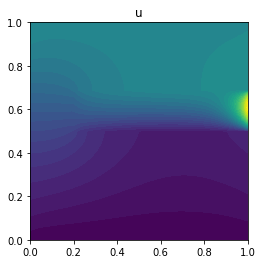

In [29]:
# Plot solution and gradient
plot(u, title="u")

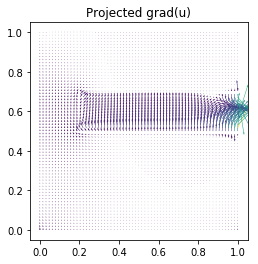

In [19]:
plot(grad(u), title="Projected grad(u)")